### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Horizontal motion with friction (static and dynamic) 
Parameters setup

In [3]:
M = 1
const_g = 9.81
mi_k = .2
mi_s = .1
omega  = 2
delta = .01
epsilon = .009
ts = np.arange(0,10*np.pi/omega,delta)
f_0 = 2
force = f_0 * np.sin(omega*ts) 

init_x, init_v = 0, 0

Euler solution

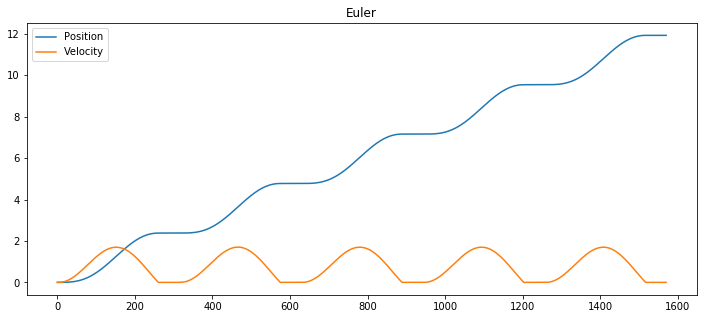

In [14]:
x, v = init_x, init_v
exs, evs = [], []
for idx, t in enumerate(ts):
    if -epsilon < v and epsilon > v and force[idx]<M*mi_s:
        exs.append(x)
        evs.append(0)
    else:
        v = v + (force[idx]-mi_k*M*np.sign(v))*delta
        x = x + v * delta
        exs.append(x)
        evs.append(v)
    

plt.figure(figsize=(12, 5))
plt.title("Euler")
plt.plot(exs, label="Position")
plt.plot(evs, label="Velocity")
plt.legend();

Midpoint solution

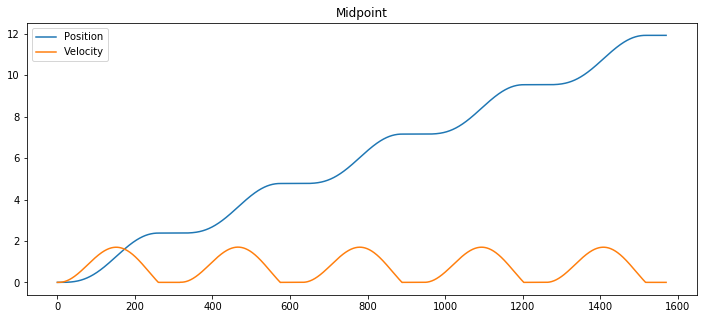

In [18]:
x, v = init_x, init_v
mxs, mvs = [], []
for idx, t in enumerate(ts):
    if -epsilon < v and epsilon > v and force[idx]<M*mi_s:
        mxs.append(x)
        mvs.append(0)
    else:
        k1x = (x + x + delta*v)/2
        k1v = (v + v + delta*(force[idx]-mi_k*M*np.sign(v)))/2
        
        v = (2 * k1v  + delta*(force[idx]-mi_k*M*np.sign(v)))/2
        x = (k1x + k1x + delta*v)/2
        mxs.append(x)
        mvs.append(v)
    

plt.figure(figsize=(12, 5))
plt.title("Midpoint")
plt.plot(mxs, label="Position")
plt.plot(mvs, label="Velocity")
plt.legend();

4<sup>th</sup> order Runge-Kutta method

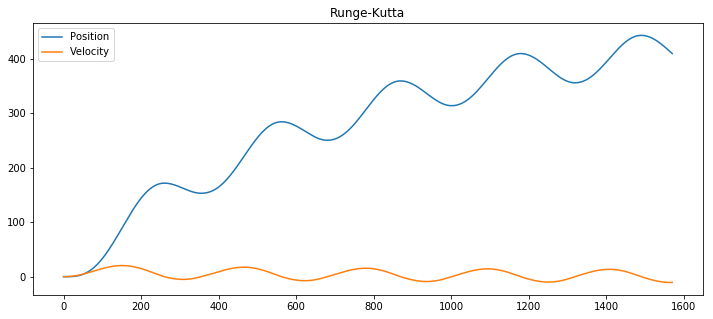

In [26]:
x, v = init_x, init_v
rxs, rvs = [], []
for idx, t in enumerate(ts):
    if -epsilon < v and epsilon > v and force[idx]<M*mi_s:
        rxs.append(x)
        rvs.append(0)
    else:
        i = min(idx, len(ts)-2)
        k1x = v
        k2x = (v + v + delta*(force[idx]-mi_k*M*np.sign(v)))/2
        k3x = k2x
        k4x = v + delta*(force[idx]-mi_k*M*np.sign(v))
        k1v = force[idx]-mi_k*M*np.sign(v)
        k2v = k1v + force[i+1]-mi_k*M*np.sign(v)
        k3v = k2v + force[i+1]-mi_k*M*np.sign(v)
        k4v = force[i+1]-mi_k*M*np.sign(v)
        
        x = x + delta*(k1x + 2*k2x + 2*k3x + k4x)
        v = v + delta*(k1v + 2*k2v + 2*k3v + k4v)
        
        rxs.append(x)
        rvs.append(v)
    

plt.figure(figsize=(12, 5))
plt.title("Runge-Kutta")
plt.plot(rxs, label="Position")
plt.plot(rvs, label="Velocity")
plt.legend();

In [27]:
min(1571, len(ts)-1)

1570

Comparison

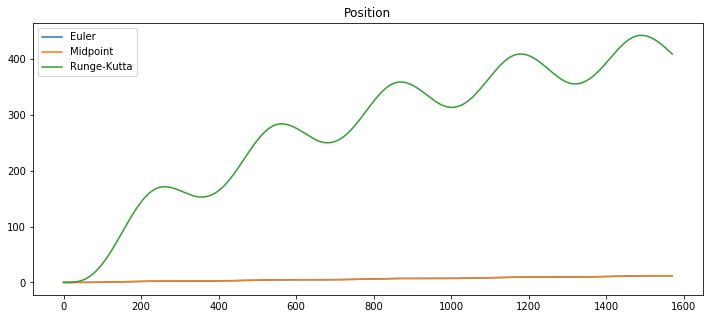

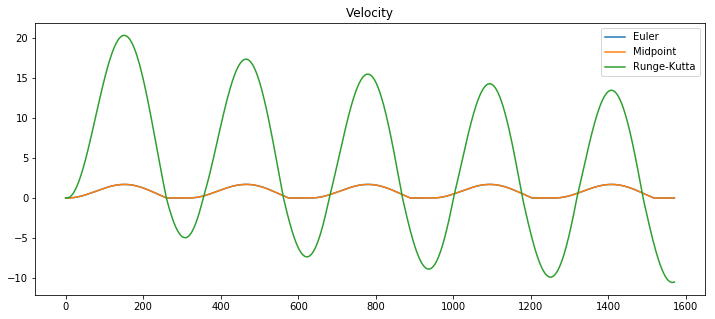

In [28]:
plt.figure(figsize=(12, 5))
plt.title("Position")
plt.plot(exs, label="Euler")
plt.plot(mxs, label="Midpoint")
plt.plot(rxs, label="Runge-Kutta")
plt.legend()
plt.figure(figsize=(12, 5))
plt.title("Velocity")
plt.plot(evs, label="Euler")
plt.plot(mvs, label="Midpoint")
plt.plot(rvs, label="Runge-Kutta")
plt.legend();